In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_final_production_raw = pd.read_csv('./data/Producción_de_energía_eléctrica.csv', sep=',', decimal='.', skiprows=6)

df_final_production_raw = df_final_production_raw.T
df_final_production_raw.columns = df_final_production_raw.iloc[0]
df_final_production_raw = df_final_production_raw[1:]
df_final_production_raw.index.name = 'ANY'

df_final_production = df_final_production_raw[['Energías no renovables', 'Energías renovables']]
df_final_production = df_final_production.rename(columns={'Energías no renovables': 'Final production NON-REN', 'Energías renovables': 'Final production REN'})
df_final_production['Final production TOTAL'] = df_final_production.iloc[:, 0:2].sum(axis=1)

df_final_production

Unnamed: 0,Final production NON-REN,Final production REN,Final production TOTAL
ANY,,,
2022,37601.4,6934.4,44535.8
2021,34911.0,7427.2,42338.2
2020,36227.3,8878.2,45105.5
2019,39911.2,7575.3,47486.5
2018,35397.9,9101.6,44499.5
2017,39343.8,7683.3,47027.1
2016,37476.7,7842.2,45318.9
2015,36907.7,8364.6,45272.3
2014,34419.9,9385.8,43805.7


In [3]:
df_final_consumption_raw = pd.read_csv('./data/Consumo_final_de_energía_por_tipo.csv', sep=',', decimal='.', skiprows=7)

df_final_consumption_raw = df_final_consumption_raw.set_index('Unnamed: 0')
df_final_consumption_raw.index.name = 'ANY'

df_final_consumption = df_final_consumption_raw[['Total']] * 11.63
df_final_consumption = df_final_consumption.rename(columns={'Total': 'Final consumption TOTAL'})

df_final_consumption = df_final_consumption.loc[2022:2010]

df_final_consumption

,Final consumption TOTAL
ANY,
2022,165977.545
2021,161684.912
2020,152411.150
2019,171536.685
2018,169915.463
2017,165457.684
2016,161568.612
2015,158677.394
2014,154048.654


In [4]:
df_emissions_raw = pd.read_csv('./data/Emissions_de_GEH_a_Catalunya_20250127.csv', sep=',', decimal='.')

df_emissions = df_emissions_raw.groupby(['ANY', 'CONTAMINANT'])['CO2EQ'].sum().unstack().loc[:, ['CO2', 'CH4', 'N2O']]

df_emissions = df_emissions.loc[2010:2022]

df_emissions

CONTAMINANT,CO2,CH4,N2O
ANY,,,
2010,34086.952676,6178.687116,1280.864603
2011,31317.374190,6424.872715,1237.690341
2012,28536.359028,6594.663804,1197.999849
2013,26555.819804,5818.983509,1163.452978
2014,26449.541535,5977.590151,1214.864973
2015,27524.916541,6191.560544,1221.804750
2016,28755.086078,6198.351814,1214.765624
2017,29939.164766,5902.051529,1264.005677
2018,30086.839662,5670.271829,1259.370654


In [5]:
df_employed_raw = pd.read_csv('./data/Población_ocupada_por_sectores_de_actividad_y_sexo.csv', sep=',', decimal='.', skiprows=11, nrows=34-11)

df_employed_raw = df_employed_raw.set_index('Unnamed: 0')
df_employed_raw.index.name = 'ANY'

df_employed = df_employed_raw[['Industria']]
df_employed = df_employed.rename(columns={'Industria': 'Employed in industry'})

df_employed = df_employed.loc[2022:2010]

df_employed

,Employed in industry
ANY,
2022,617.2
2021,587.2
2020,587.5
2019,621.3
2018,626.6
2017,590.5
2016,583.6
2015,582.1
2014,558.4


In [6]:
df_consumer_price_raw = pd.read_csv('./data/Índex_de_preus_de_consum.csv', sep=',', decimal='.', skiprows=7, nrows=284-11)

df_consumer_price_raw['Unnamed: 0'] = pd.to_datetime(df_consumer_price_raw['Unnamed: 0'], format='%m/%Y')
df_consumer_price_raw['ANY'] = df_consumer_price_raw['Unnamed: 0'].dt.year

df_consumer_price = df_consumer_price_raw.groupby('ANY')['Productes energètics'].mean().reset_index()
df_consumer_price = df_consumer_price.rename(columns={'Productes energètics': 'CPI'})
df_consumer_price = df_consumer_price.set_index('ANY')
df_consumer_price = df_consumer_price.loc[2010:2022]

df_consumer_price

,CPI
ANY,
2010,78.955500
2011,91.105750
2012,99.314833
2013,99.007833
2014,97.932750
2015,89.351583
2016,81.963250
2017,88.546000
2018,94.264000


In [7]:
df_industrial_price_raw = pd.read_csv('./data/Índex_de_preus_industrials.csv', sep=',', decimal='.', skiprows=9, nrows=286-11)

df_industrial_price_raw = df_industrial_price_raw[pd.to_datetime(df_industrial_price_raw['Unnamed: 0'], format='%m/%Y', errors='coerce').notna()]
df_industrial_price_raw['Unnamed: 0'] = pd.to_datetime(df_industrial_price_raw['Unnamed: 0'], format='%m/%Y')
df_industrial_price_raw['ANY'] = df_industrial_price_raw['Unnamed: 0'].dt.year

df_industrial_price = df_industrial_price_raw.groupby('ANY')['Energia'].mean().reset_index()
df_industrial_price = df_industrial_price.rename(columns={'Energia': 'IPI'})
df_industrial_price = df_industrial_price.set_index('ANY')
df_industrial_price = df_industrial_price.loc[2010:2022]

df_industrial_price

,IPI
ANY,
2010,77.266667
2011,89.025000
2012,97.833333
2013,98.891667
2014,93.491667
2015,83.341667
2016,71.766667
2017,81.108333
2018,87.658333


In [8]:
df_final_production.index = df_final_production.index.astype(int)
df_final_production = df_final_production.sort_index()

df_concated = pd.concat([df_final_production, df_final_consumption, df_emissions, df_employed, df_consumer_price, df_industrial_price], axis=1)
df_concated

,Final production NON-REN,Final production REN,Final production TOTAL,Final consumption TOTAL,CO2,CH4,N2O,Employed in industry,CPI,IPI
ANY,,,,,,,,,,
2010,41033.5,7521.5,48555.0,177666.858,34086.952676,6178.687116,1280.864603,621.9,78.955500,77.266667
2011,38504.8,6705.9,45210.7,169511.902,31317.374190,6424.872715,1237.690341,590.3,91.105750,89.025000
2012,39523.4,7149.6,46673.0,162047.768,28536.359028,6594.663804,1197.999849,563.8,99.314833,97.833333
2013,37553.3,9941.4,47494.7,153604.388,26555.819804,5818.983509,1163.452978,547.2,99.007833,98.891667
2014,34419.9,9385.8,43805.7,154048.654,26449.541535,5977.590151,1214.864973,558.4,97.932750,93.491667
2015,36907.7,8364.6,45272.3,158677.394,27524.916541,6191.560544,1221.804750,582.1,89.351583,83.341667
2016,37476.7,7842.2,45318.9,161568.612,28755.086078,6198.351814,1214.765624,583.6,81.963250,71.766667
2017,39343.8,7683.3,47027.1,165457.684,29939.164766,5902.051529,1264.005677,590.5,88.546000,81.108333
2018,35397.9,9101.6,44499.5,169915.463,30086.839662,5670.271829,1259.370654,626.6,94.264000,87.658333


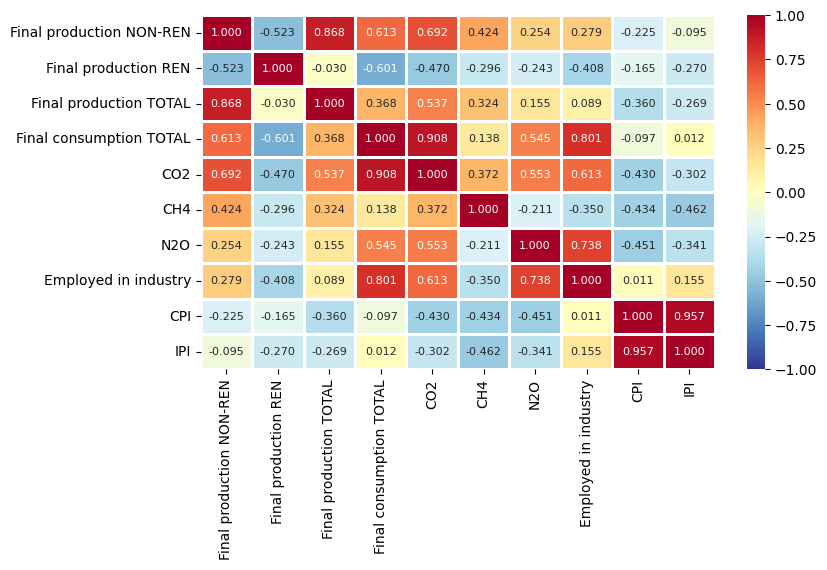

In [39]:
from matplotlib.colors import LinearSegmentedColormap

correlation_matrix = df_concated.corr()

fig, ax = plt.subplots(figsize=(8.3, 4.6))

heatmap = sns.heatmap(
    correlation_matrix,
    vmin=-1,
    vmax=1,
    cmap='RdYlBu_r',
    annot=True,
    annot_kws={'size': 8},
    fmt='.3f',
    cbar=True,
    linewidths=1,
    alpha=1,
    ax=ax
)

plt.show()

In [57]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_concated['CO2'], df_concated['Final production REN'].astype(float))

print(f'Trend: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Correlation coefficient: {r_value:.2f}')
print(f'P-value: {p_value:.10f}')
print(f'Standard error: {std_err:.2f}')

if p_value < 0.05:
    print("YES, significant")
else:
    print("NO, non significant")


Trend: -0.21
Intercept: 14130.80
Correlation coefficient: -0.47
P-value: 0.1050552480
Standard error: 0.12
NO, non significant


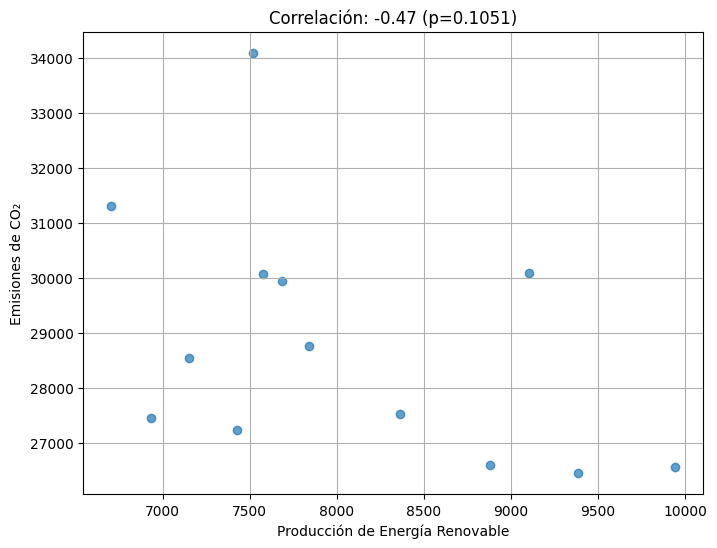

In [66]:
import scipy.stats as stats

correlacion, p_valor = stats.pearsonr(df_concated['Final production REN'].astype(float), df_concated['CO2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_concated['Final production REN'].astype(float), df_concated['CO2'], alpha=0.7)
plt.xlabel('Producción de Energía Renovable')
plt.ylabel('Emisiones de CO₂')
plt.title(f'Correlación: {correlacion:.2f} (p={p_valor:.4f})')
plt.grid(True)
plt.show()

In [58]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_concated['CO2'], df_concated['Final production NON-REN'].astype(float))

print(f'Trend: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Correlation coefficient: {r_value:.2f}')
print(f'P-value: {p_value:.10f}')
print(f'Standard error: {std_err:.2f}')

if p_value < 0.05:
    print("YES, significant")
else:
    print("NO, non significant")

Trend: 0.63
Intercept: 19563.82
Correlation coefficient: 0.69
P-value: 0.0087524036
Standard error: 0.20
YES, significant


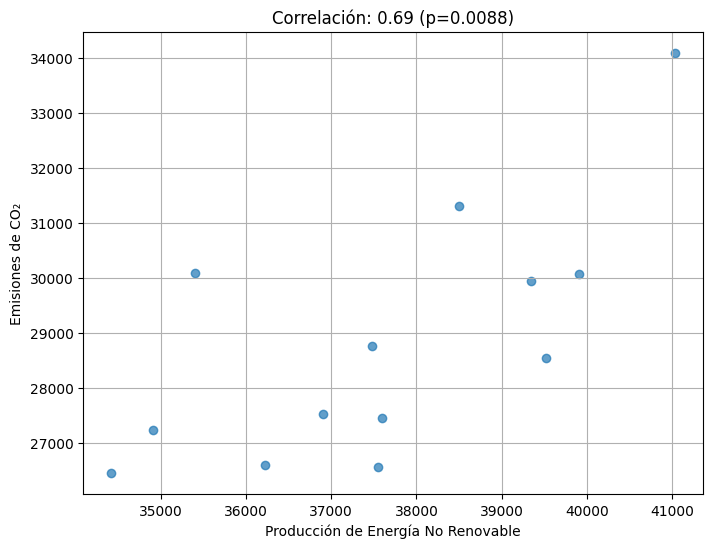

In [67]:
import scipy.stats as stats

correlacion, p_valor = stats.pearsonr(df_concated['Final production NON-REN'].astype(float), df_concated['CO2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_concated['Final production NON-REN'].astype(float), df_concated['CO2'], alpha=0.7)
plt.xlabel('Producción de Energía No Renovable')
plt.ylabel('Emisiones de CO₂')
plt.title(f'Correlación: {correlacion:.2f} (p={p_valor:.4f})')
plt.grid(True)
plt.show()

In [60]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_concated['CO2'], df_concated['Final consumption TOTAL'].astype(float))

print(f'Trend: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Correlation coefficient: {r_value:.2f}')
print(f'P-value: {p_value:.10f}')
print(f'Standard error: {std_err:.2f}')

if p_value < 0.05:
    print("YES, significant")
else:
    print("NO, non significant")

Trend: 3.08
Intercept: 74533.60
Correlation coefficient: 0.91
P-value: 0.0000179854
Standard error: 0.43
YES, significant


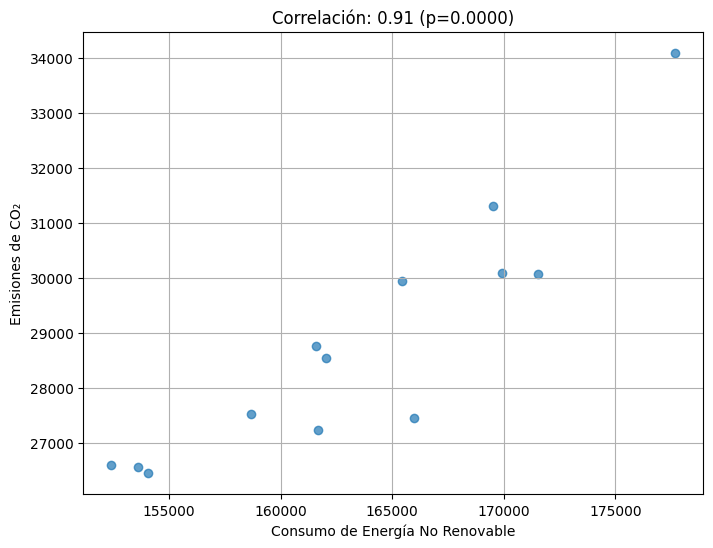

In [68]:
import scipy.stats as stats

correlacion, p_valor = stats.pearsonr(df_concated['Final consumption TOTAL'].astype(float), df_concated['CO2'])

plt.figure(figsize=(8, 6))
plt.scatter(df_concated['Final consumption TOTAL'].astype(float), df_concated['CO2'], alpha=0.7)
plt.xlabel('Consumo de Energía')
plt.ylabel('Emisiones de CO₂')
plt.title(f'Correlación: {correlacion:.2f} (p={p_valor:.4f})')
plt.grid(True)
plt.show()

In [63]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_concated['Employed in industry'].astype(float), df_concated['Final production REN'].astype(float))

print(f'Trend: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Correlation coefficient: {r_value:.2f}')
print(f'P-value: {p_value:.10f}')
print(f'Standard error: {std_err:.2f}')

if p_value < 0.05:
    print("YES, significant")
else:
    print("NO, non significant")


Trend: -16.24
Intercept: 17628.34
Correlation coefficient: -0.41
P-value: 0.1659482474
Standard error: 10.94
NO, non significant


In [64]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df_concated['Employed in industry'].astype(float), df_concated['Final consumption TOTAL'].astype(float))

print(f'Trend: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'Correlation coefficient: {r_value:.2f}')
print(f'P-value: {p_value:.10f}')
print(f'Standard error: {std_err:.2f}')

if p_value < 0.05:
    print("YES, significant")
else:
    print("NO, non significant")


Trend: 240.40
Intercept: 21414.10
Correlation coefficient: 0.80
P-value: 0.0010107820
Standard error: 54.26
YES, significant


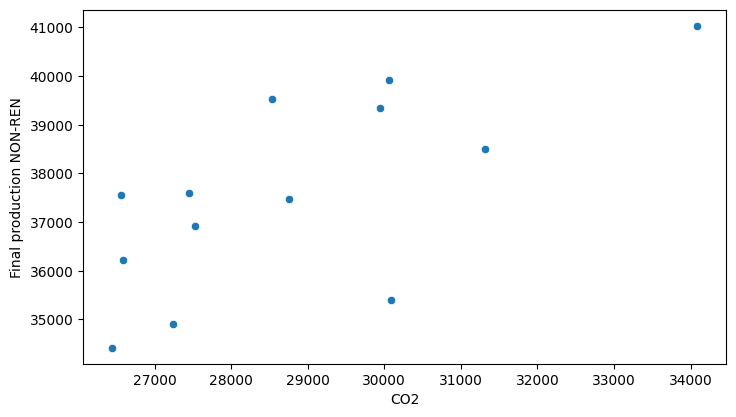

In [49]:
fig, ax = plt.subplots(figsize=(8.3, 4.6))

sns.scatterplot(
    x=df_concated['CO2'],
    y=df_concated['Final production NON-REN'],
    ax=ax
)

plt.show()

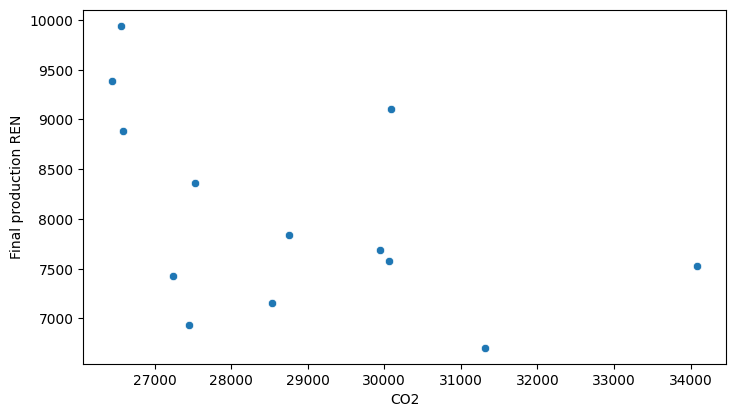

In [50]:
fig, ax = plt.subplots(figsize=(8.3, 4.6))

sns.scatterplot(
    x=df_concated['CO2'],
    y=df_concated['Final production REN'],
    ax=ax
)

plt.show()

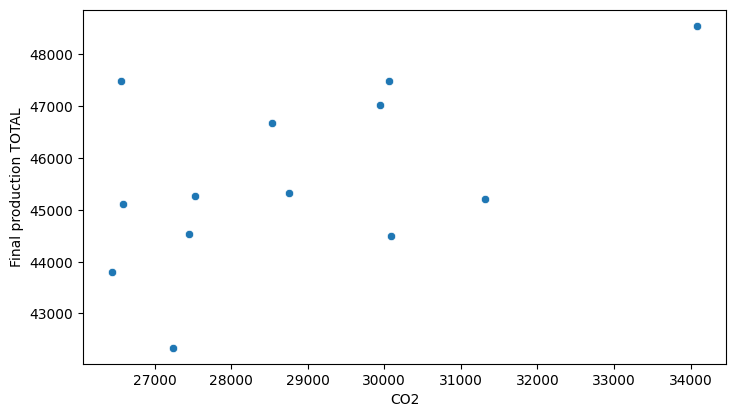

In [43]:
fig, ax = plt.subplots(figsize=(8.3, 4.6))

sns.scatterplot(
    x=df_concated['CO2'],
    y=df_concated['Final production TOTAL'],
    ax=ax
)

plt.show()

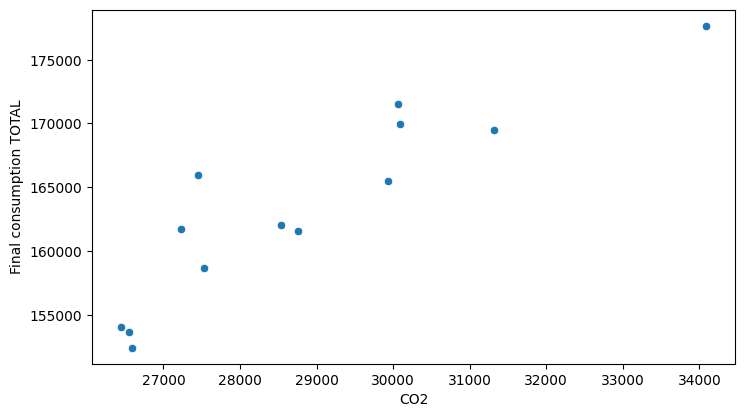

In [44]:
fig, ax = plt.subplots(figsize=(8.3, 4.6))

sns.scatterplot(
    x=df_concated['CO2'],
    y=df_concated['Final consumption TOTAL'],
    ax=ax
)

plt.show()

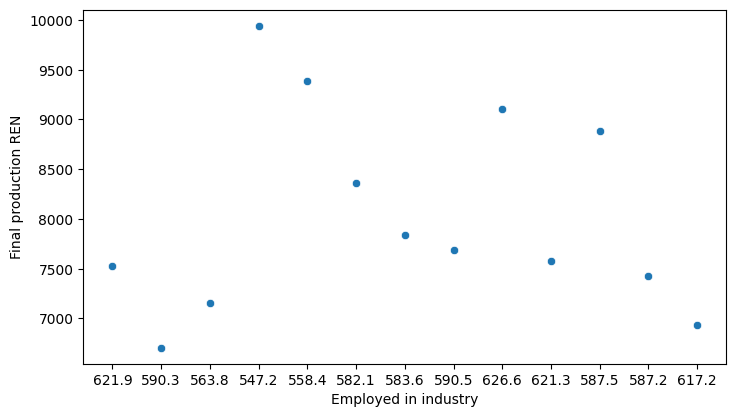

In [45]:
fig, ax = plt.subplots(figsize=(8.3, 4.6))

sns.scatterplot(
    x=df_concated['Employed in industry'],
    y=df_concated['Final production REN'],
    ax=ax
)

plt.show()

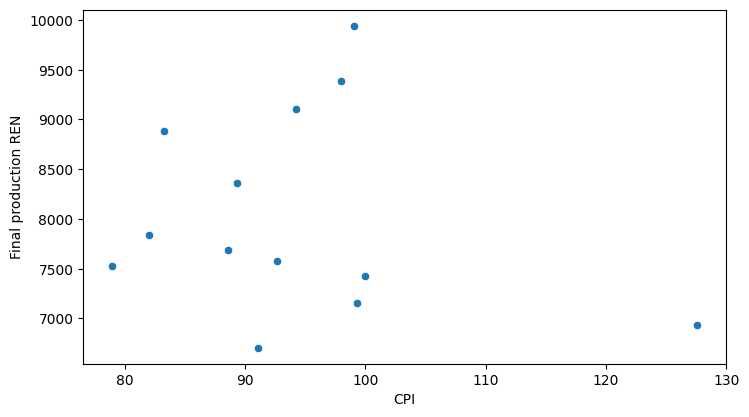

In [46]:
fig, ax = plt.subplots(figsize=(8.3, 4.6))

sns.scatterplot(
    x=df_concated['CPI'],
    y=df_concated['Final production REN'],
    ax=ax
)

plt.show()

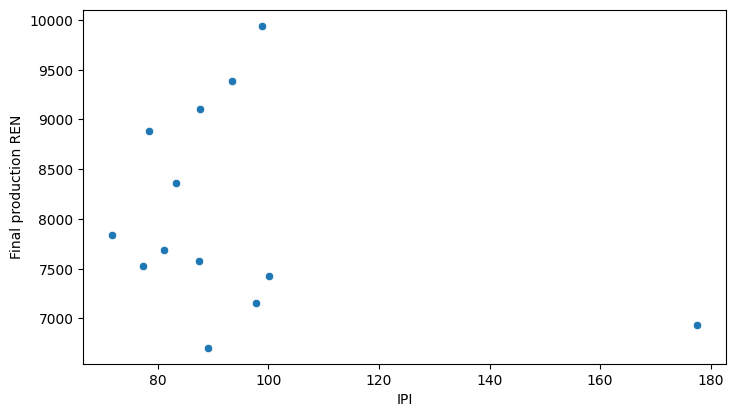

In [47]:
fig, ax = plt.subplots(figsize=(8.3, 4.6))

sns.scatterplot(
    x=df_concated['IPI'],
    y=df_concated['Final production REN'],
    ax=ax
)

plt.show()